## 6.5 Machine Learning Part 2

### This script contains the following
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#define a path
path = r'C:\Users\haari\OneDrive\Documents\Temperature Change Analysis'

In [4]:
#import the dataset Temp_data_Clean and FAOSTAT_clean
df_stat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'FAOSTAT_Clean.csv'), index_col = False)

In [5]:
#check the data frames
df_stat.shape

(222012, 8)

In [6]:
df_stat.head()

,Unnamed: 0,Area Code (FAO),Country,Months Code,Months,Year,Temp_Change,Temperature Change
0,0,2,Afghanistan,7001,January,1961,0.746,High temp Change
1,1,2,Afghanistan,7001,January,1962,0.009,High temp Change
2,2,2,Afghanistan,7001,January,1963,2.695,High temp Change
3,3,2,Afghanistan,7001,January,1964,-5.277,Extreme Temp Change
4,4,2,Afghanistan,7001,January,1965,1.827,High temp Change


In [7]:
#renaming columns in df_stat
df_stat.rename(columns = {'Area Code (FAO)':'Country Code'}, inplace = True)

In [8]:
df_stat1 = df_stat.drop(columns = 'Unnamed: 0')

In [9]:
df_stat1.columns

Index(['Country Code', 'Country', 'Months Code', 'Months', 'Year',
       'Temp_Change', 'Temperature Change'],
      dtype='object')

In [10]:
df_stat2 = df_stat1.drop(columns = {'Country', 'Months', 'Temperature Change'})

In [11]:
df_stat2.columns

Index(['Country Code', 'Months Code', 'Year', 'Temp_Change'], dtype='object')

In [12]:
df_stat2.shape

(222012, 4)

In [13]:
df_stat3 = df_stat2[df_stat2['Year'] > 2000]

In [14]:
df_stat3.shape

(77369, 4)

In [15]:
df_stat4 = df_stat3[df_stat3['Months Code'] > 7015 ]

In [16]:
df_stat4.shape

(22771, 4)

In [17]:
df_stat4.columns

Index(['Country Code', 'Months Code', 'Year', 'Temp_Change'], dtype='object')

In [18]:
data = df_stat2.groupby('Year').agg({'Temp_Change':'mean'}) 

In [19]:
data.shape

(60, 1)

In [20]:
data.head(60)

,Temp_Change
Year,
1961,0.144699
1962,-0.035784
1963,-0.030519
1964,-0.115801
1965,-0.221856
1966,0.108907
1967,-0.126955
1968,-0.164114
1969,0.126069


### 2. The Elbow Technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above."

In [22]:
score_stat = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score_stat

C:\Users\haari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-13.643698922725394,
 -3.021161025090507,
 -1.5528349604920328,
 -0.8040696819612286,
 -0.445199130269727,
 -0.32239203871457184,
 -0.23323584900591338,
 -0.1923774794600776,
 -0.14698258324136163]

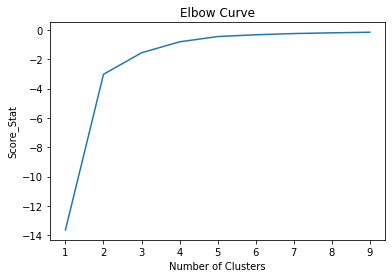

In [23]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score_stat)
pl.xlabel('Number of Clusters')
pl.ylabel('Score_Stat')
pl.title('Elbow Curve')
pl.show()

In the above elbow curve, the curve seems to flatten out after 3 making the number of clusters for this data set to be 3

### 3. k-means Clustering

In [24]:
#create the k-means object for df_stat dataframe
kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [25]:
# Fit the k-means object to the data
kmeans.fit(data)

C:\Users\haari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [26]:
data['clusters'] = kmeans.fit_predict(data)

C:\Users\haari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [27]:
data.head()

,Temp_Change,clusters
Year,,
1961,0.144699,1
1962,-0.035784,1
1963,-0.030519,1
1964,-0.115801,1
1965,-0.221856,1


In [28]:
data.isnull().sum()

Temp_Change    0
clusters       0
dtype: int64

In [29]:
data['clusters'].value_counts()

1    33
2    20
0     7
Name: clusters, dtype: int64

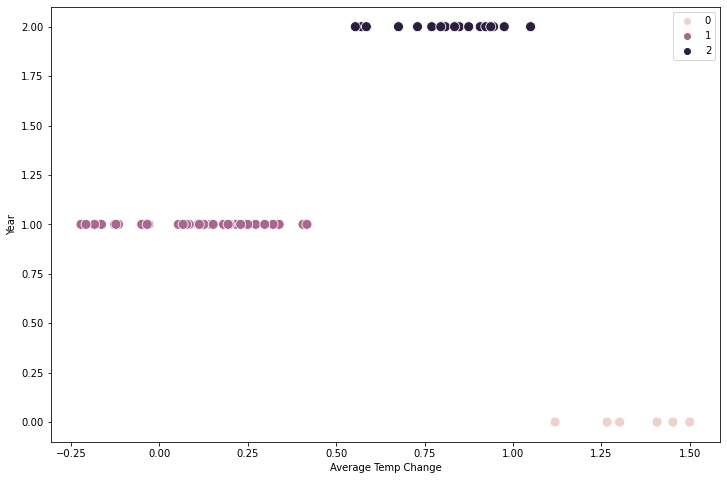

In [30]:
# Plot the clusters for the 'Year' and 'Temp_Change' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['Temp_Change'], y=data['clusters'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average Temp Change') # Label x-axis.
plt.ylabel('Year') # Label y-axis.
plt.show()

The above cluster are grouped based on the average Temp. Change from negative to positive.

In [31]:
data.loc[data['clusters'] == 2, 'cluster'] = 'dark purple'
data.loc[data['clusters'] == 1, 'cluster'] = 'purple'
data.loc[data['clusters'] == 0, 'cluster'] = 'pink'

In [32]:
data.groupby('cluster').agg({'Temp_Change':['mean', 'median']})

Temp_Change          
                   mean    median
cluster                          
dark purple    0.803211  0.839061
pink           1.335355  1.302246
purple         0.095407  0.112895

From the above scatterplot with clusters, we can see that the average Temperature Changes are clustered or grouped into 3 groups based on the temperature being very low, very high and in between. From this, we can find what year had extreme temperatures and what year had medium temperatures. 

In [35]:
#exporting data
data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Data_Clusters.csv'))